# EDA
Here, we'll conduct all of the EDA for this project.

In [11]:
import mysql.connector 
import config
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password
)
cursor = cnx.cursor()
cursor.execute("USE google_maps")

In [18]:
cursor.execute("""SELECT * FROM trips;""")
df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.head()

,departure_time,trip_direction,trip_duration
0,2020/02/18 00:00,0,51
1,2020/02/18 00:00,1,60
2,2020/02/18 00:05,0,51
3,2020/02/18 00:05,1,60
4,2020/02/18 00:10,0,64


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
departure_time    184 non-null object
trip_direction    184 non-null int64
trip_duration     184 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.4+ KB


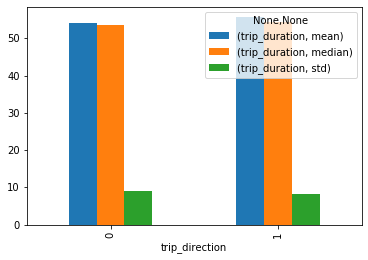

In [40]:
df.groupby(by='trip_direction').agg(['mean','median','std']).plot(kind='bar')

In [49]:
df.sort_values(by=['trip_direction','departure_time'])

,departure_time,trip_direction,trip_duration
0,2020/02/18 00:00,0,51
2,2020/02/18 00:05,0,51
4,2020/02/18 00:10,0,64
6,2020/02/18 00:15,0,75
8,2020/02/18 00:25,0,55
...,...,...,...
175,2020/02/18 08:58,1,56
177,2020/02/18 09:03,1,57
179,2020/02/18 09:09,1,45
181,2020/02/18 09:14,1,46


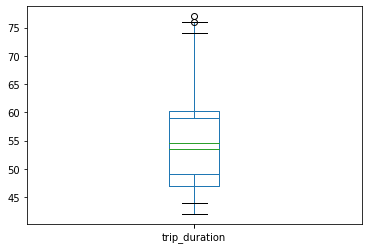

In [42]:
df[df['trip_direction'] == 0]['trip_duration'].plot(kind='box');
df[df['trip_direction'] == 1]['trip_duration'].plot(kind='box');

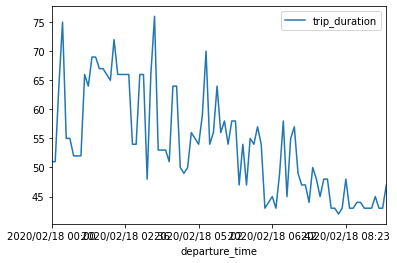

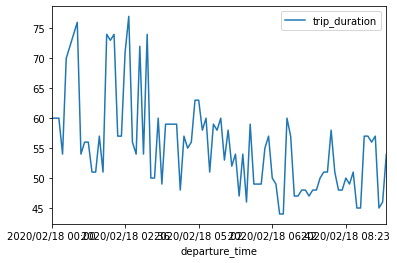

In [50]:
df[df['trip_direction'] == 0].plot(x='departure_time',y='trip_duration');
df[df['trip_direction'] == 1].plot(x='departure_time',y='trip_duration');

True

In [ ]:
cursor.close()
cnx.close()